<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spearman's-rank-Correlation-Coefficient-using-Ordinal-Data" data-toc-modified-id="Spearman's-rank-Correlation-Coefficient-using-Ordinal-Data-1">Spearman's rank Correlation Coefficient using Ordinal Data</a></span><ul class="toc-item"><li><span><a href="#Discover-the-strength-of-monotonic-relation" data-toc-modified-id="Discover-the-strength-of-monotonic-relation-1.1">Discover the strength of monotonic relation</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Simplified-formula" data-toc-modified-id="Simplified-formula-3">Simplified formula</a></span></li><li><span><a href="#General-formula" data-toc-modified-id="General-formula-4">General formula</a></span></li><li><span><a href="#Pandas-corr" data-toc-modified-id="Pandas-corr-5">Pandas corr</a></span></li><li><span><a href="#Finding-manually-using-the-formula-(1-1)" data-toc-modified-id="Finding-manually-using-the-formula-(1-1)-6">Finding manually using the formula (1-1)</a></span></li><li><span><a href="#Finding-manually-using-the-formula-(1-2)" data-toc-modified-id="Finding-manually-using-the-formula-(1-2)-7">Finding manually using the formula (1-2)</a></span></li><li><span><a href="#Strictly-increasing" data-toc-modified-id="Strictly-increasing-8">Strictly increasing</a></span></li><li><span><a href="#Strictly-decreasing" data-toc-modified-id="Strictly-decreasing-9">Strictly decreasing</a></span></li><li><span><a href="#No-monotonic-behavior" data-toc-modified-id="No-monotonic-behavior-10">No monotonic behavior</a></span></li><li><span><a href="#Real-life-example" data-toc-modified-id="Real-life-example-11">Real life example</a></span><ul class="toc-item"><li><span><a href="#Importing-a-CSV-file" data-toc-modified-id="Importing-a-CSV-file-11.1">Importing a CSV file</a></span></li></ul></li><li><span><a href="#Plotting-imported-data" data-toc-modified-id="Plotting-imported-data-12">Plotting imported data</a></span></li><li><span><a href="#Ranking-data" data-toc-modified-id="Ranking-data-13">Ranking data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-14">Conclusion</a></span></li><li><span><a href="#Examples-to-use-Spearman's-correlation-are:" data-toc-modified-id="Examples-to-use-Spearman's-correlation-are:-15">Examples to use Spearman's correlation are:</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-16">Reference</a></span></li></ul></div>

# Spearman's rank Correlation Coefficient using Ordinal Data

## Discover the strength of monotonic relation

# Introduction

Spearman's rank correlation coefficient, $r_s$ shows the correlation between two ordinal data. How one ordinal data changes as the other ordinal changes. 

A function between ordered sets is called a monotonic function.

In this article, I explore different methods to find Spearman's rank correlation coefficient using data with distinct ranks.

Spearman's rank correlation requires ordinal data. Examples of ordinal data are:

- 1st, 2nd, 3rd, 
- Small, Medium, Large, XL,
- Strongly agree, Agree, Neutral, Disagree, Strongly Disagree
- Very often, Often, Not Often, Not at all

# Simplified formula

When all ranks are distinct integers, the Spearman correlation coefficient is computed by the following formula.

$$r_s=1-\frac{6\sum d^2}{n(n^2-1)} \tag{1-1}$$

This formla is an alternative to Pearson's correlation if the the data are ordinal and monotonic and if there are no ties in data.

A value of 1 means the set of data is strictly increasing and the value of -1 means it is strictly decreasing. A value of 0 means that data shows no monotonic behavior. the Spearman correlation between two variables will be high when an observation has a similar rank between the two variables.


# General formula

The Spearman correlation coefficient is defined as the Pearson correlation coefficient using the rank variables.
After raw data, x and y, are converted to ranked data $r_x$ and $r_y$, The Spearman correlation coefficient is defined as:

$$
\begin{align}
\rho_{r_x,r_y}= \frac{cov(r_x,r_y)}{\sigma _{rx} \sigma _{ry}} \tag{1-1}
\end{align}
$$

where <br>
$cov(r_x,r_y)$: the covariance of ranked data $r_x$ and $r_y$.<br> 
$\sigma_{rx}$ and $\sigma_{ry}$ are the standard deviations of $r_x$ and $r_y$.

Let's find out how the correlation of the rank at 5km run relates to the rank of 10km run. All ranks are distinct integers and no same numbers. There are different ways to find the coefficient.

1. [`scipy.stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) calculates a Spearman correlation coefficient with the associated p-value.
2. [Pandas corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr) 
3. Using the formula (1-1)
4. Using the formula (1-2)

We import necessary libraries.

In [1]:
# https://gist.github.com/shinokada/574f639d4f07ed1388abd8f24f6936a4

In [2]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

In [3]:
# https://gist.github.com/shinokada/83b2d7cd47e4fc1993d50400570e1b36

,After 5km,End of race
0,3,3
1,4,2
2,2,1
3,1,5
4,6,7
5,7,4
6,5,6


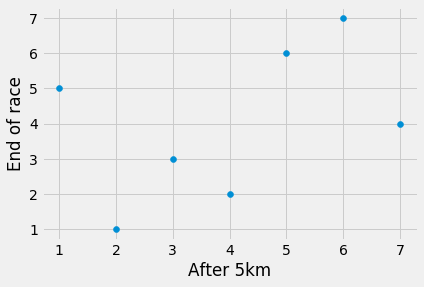

In [28]:
race = pd.DataFrame(
    [
        [3,3],
        [4,2],
        [2,1],
        [1,5],
        [6,7],
        [7,4],
        [5,6]
    ],
    columns=["After 5km","End of race"])
display(race)

# plot data
fig, ax = plt.subplots()
ax.scatter(race.iloc[:,0],race.iloc[:,1])
ax.set_xlabel('After 5km')
ax.set_ylabel('End of race')
ax.grid(True)
plt.show()

We find $r_s$ and p-value using `scipy.stats.spearmanr`.

In [5]:
# https://gist.github.com/shinokada/cc6039ce789f594a134b644ce9afebcd 

In [6]:
correlation, pval = spearmanr(race)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.428571, p-value=0.337368


p-value is the level of significance. It determines the probability that the correlation happened by chance.


In [7]:
# https://gist.github.com/shinokada/62fc538f01252f765bdf789a0efa80d6

In [8]:
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
if pval < 0.05:
    print('At 5% level of significance, the final rankings is significant or dependent')
else:
    print('At 5% level of significance, the final rankings is not significant or independent')

correlation=0.428571, p-value=0.337368
At 5% level of significance, the final rankings is not significant or independent


# Pandas corr

In [9]:
race.corr(method='spearman')

,After 5km,End of race
After 5km,1.000000,0.428571
End of race,0.428571,1.000000


Pandas corr returns a correlation matrix. We need to select the value from `[0,1]`.

In [29]:
race.corr(method='spearman').iloc[0,1]

0.42857142857142855

# Finding manually using the formula (1-1)


Rank Set A|Rank Set B|d|$d^2$
:-:|:-:|:-:|:-:
3|3|0|0
4|2|2|4
2|1|1|1
1|5|4|16
6|7|1|1
7|4|3|9
5|6|1|1

$$
\sum d^2=0+4+1+16+1+9+1=32 \\
\text{Since all ranks are distinct intergers we use the equation (1-2)} \\
r_s=1-\frac{6\sum d^2}{n(n^2-1)} \\
r_s=1-\frac{6\cdot 32}{7(7^2-1)} \\
r_s=0.4285714285714286
$$


In [10]:
1-(6*(0+4+1+16+1+9+1)/(7*(7**2-1)))

0.4285714285714286

# Finding manually using the formula (1-2)

$$
\begin{align}
\rho_{r_x,r_y}= \frac{cov(r_x,r_y)}{\sigma _{rx} \sigma _{ry}} \tag{1-2}
\end{align}
$$

We find the covariance of $r_x$ and $r_y$, standard deviation of $\sigma _{rx}, \sigma _{ry}$.

In [11]:
cov_n=np.cov(race.iloc[:,0],race.iloc[:,1],ddof=0)[0][1]
std_nx = np.std(race.iloc[:,0])
std_ny=np.std(race.iloc[:,1])
cov_n/(std_nx*std_ny)

0.42857142857142855

As we expected we get all the same results.

# Strictly increasing

A value of 1 means the set of data is strictly increasing. The rank do not change. p-value is 0 in this case.

In [12]:
# https://gist.github.com/shinokada/318d5d1eb9a7981f003447ee19adaca6

correlation=1.000000, p-value=0.000000


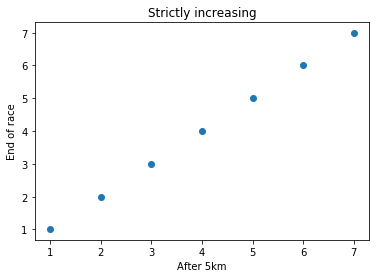

In [13]:
race2 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,5],
        [6,6],
        [7,7]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race2)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
fig, ax = plt.subplots()
ax.scatter(race2.iloc[:,0],race2.iloc[:,1])
ax.set_xlabel('After 5km')
ax.set_ylabel('End of race')
ax.set_title('Strictly increasing')
plt.show()

# Strictly decreasing
The value of -1 means it is strictly decreasing. The rank is in a reversal order.

In [14]:
# https://gist.github.com/shinokada/817f920c45bd3f983ca9bd6ed2dd1838

correlation=-1.000000, p-value=0.000000


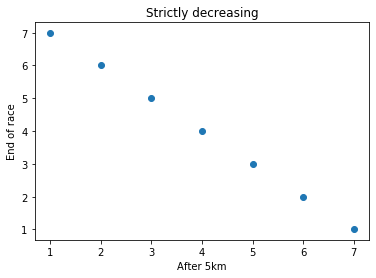

In [15]:
race3 = pd.DataFrame(
    [
        [1,7],
        [2,6],
        [3,5],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race3)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
fig, ax = plt.subplots()
ax.scatter(race3.iloc[:,0],race3.iloc[:,1])
ax.set_xlabel('After 5km')
ax.set_ylabel('End of race')
ax.set_title('Strictly decreasing')
plt.show()

# No monotonic behavior
No monotonic behavior gives the value of 0.

In [16]:
# https://gist.github.com/shinokada/3c5f78acda90a402288d75b8c795953b

correlation=0.000000, p-value=1.000000


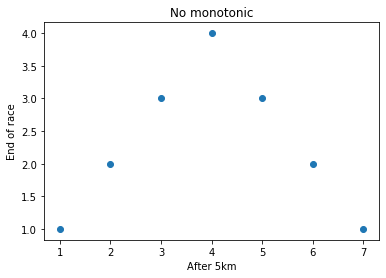

In [17]:
race4 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race4)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
fig, ax = plt.subplots()
ax.scatter(race4.iloc[:,0],race4.iloc[:,1])
ax.set_xlabel('After 5km')
ax.set_ylabel('End of race')
ax.set_title('No monotonic')
plt.show()

# Real life example
## Importing a CSV file

We will use data from BIXI Montréal is a public bicycle sharing system serving Montréal, Quebec, Canada. It is a big file so it takes time to process data.

In [18]:
# https://gist.github.com/shinokada/38870816b84774930b56aea3ba4077b3

In [19]:
rides = pd.read_csv('https://raw.githubusercontent.com/shinokada/python-for-ib-diploma-mathematics/master/Data/OD_2019-05.csv')
print(rides.shape)
print(rides.head())

(790323, 6)
            start_date  start_station_code             end_date  \
0  2019-05-01 00:00:19                6902  2019-05-01 00:16:24   
1  2019-05-01 00:00:33                6171  2019-05-01 00:06:05   
2  2019-05-01 00:01:12                6073  2019-05-01 00:29:27   
3  2019-05-01 00:01:17                6080  2019-05-01 00:09:34   
4  2019-05-01 00:01:23                6411  2019-05-01 00:04:49   

   end_station_code  duration_sec  is_member  
0              6387           965          1  
1              6112           331          1  
2              6331          1694          1  
3              6080           497          1  
4              6012           206          1  


There are more than seventy nine thousand of lines with six columns. Columns are start_data, start_station_code, end_date, end_station_code, duration_sec and is_member.

We group by end_station_code and sum the duration_sec. We assign n_rides with the number of end_station_code.

In [20]:
# https://gist.github.com/shinokada/9a87dfffe5d552894884abb24cc0a4d8

In [21]:
by_end_station = (
    rides
        .loc[:, ['end_station_code', 'duration_sec']]
        .groupby('end_station_code')
        .sum()
        .assign(n_rides=rides['end_station_code'].value_counts())
)
print(by_end_station.head())

                  duration_sec  n_rides
end_station_code                       
4000                   1498612     1754
4001                    181712      152
4002                    884874      894
5002                    195657      144
5003                     95648       83


# Plotting imported data

We use seaborn's [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to plot our imported data. We set labels of the x-axis and y-axis and call the data. 

In [22]:
# https://gist.github.com/shinokada/674f1dd88b9570a1101f61a19b669509

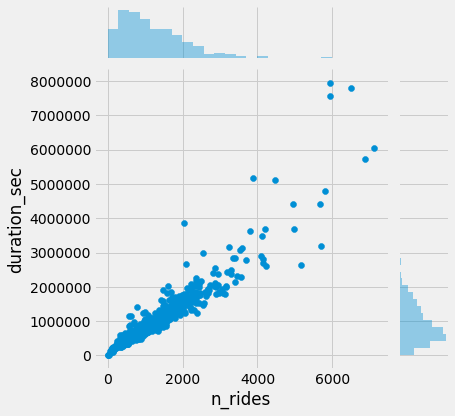

In [23]:
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.jointplot(x='n_rides', y='duration_sec', data=by_end_station)
plt.show()

# Ranking data

Please note that the majority of data are on the lower end. We can use `scipy.stats.rankdata` to see the data by ranking.

In [24]:
# https://gist.github.com/shinokada/a00fb4482a6d9729e898fb496fc74989

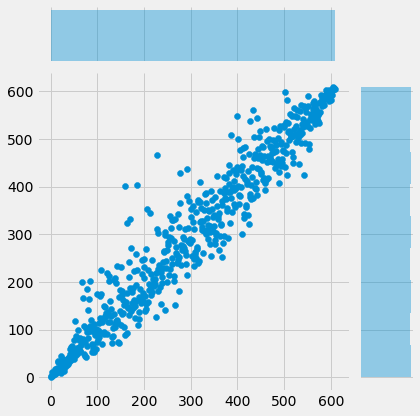

In [25]:
from scipy.stats import rankdata
sns.jointplot(x=rankdata(by_end_station['n_rides']), y=rankdata(by_end_station['duration_sec']))
plt.show()

Let's find the Spearman's $R_s$.

In [26]:
# https://gist.github.com/shinokada/af1c1ff0d722a779c95766b8983e5f98

In [27]:
correlation, pval = spearmanr(by_end_station)
print(f'correlation={correlation:.6f}')

correlation=0.964881


The number of rides at a bike stop is almost totally predictive of the number of commuter seconds spend riding it.

# Conclusion

We explored finding Spearman’s correlation coefficient using ordinal data. All four different methods worked well. In Part 2, we are going to use a different data set that has identical data. This will need extra caution finding Spearman’s correlation coefficient.

# Examples to use Spearman's correlation are:

- [IQ of a person with the number of hours spent on games](https://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient)

- [Free university meals and their CGPA scores](https://www.toppr.com/guides/business-mathematics-and-statistics/correlation-and-regression/rank-correlation/)

- [Physics and Math ranks](https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/)

# Reference

- To compare the Spearman correlation and the Pearson correlation, please read [A comparison of the Pearson and Spearman correlation here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) 

- https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php

- https://www.kaggle.com/residentmario/spearman-correlation-with-montreal-bikes/data

- https://seaborn.pydata.org/generated/seaborn.jointplot.html

- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/